In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
df =pd.read_csv('data_YesBank_StockPrices.csv')
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.shape

(185, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.select_dtypes(include='number').corr()


,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


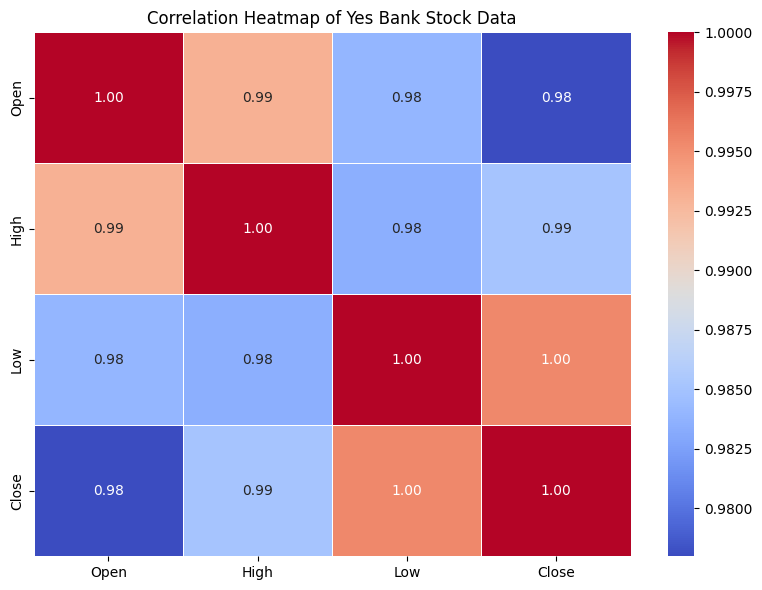

In [ ]:
corr_matrix = df[['Open', 'High', 'Low', 'Close']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Titles and layout
plt.title('Correlation Heatmap of Yes Bank Stock Data')
plt.tight_layout()
plt.show()

/tmp/ipython-input-11-1060747971.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Open'], label='Open', shade=True)
/tmp/ipython-input-11-1060747971.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['High'], label='High', shade=True)
/tmp/ipython-input-11-1060747971.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Low'], label='Low', shade=True)
/tmp/ipython-input-11-1060747971.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Close'], label='Close', shade=True)


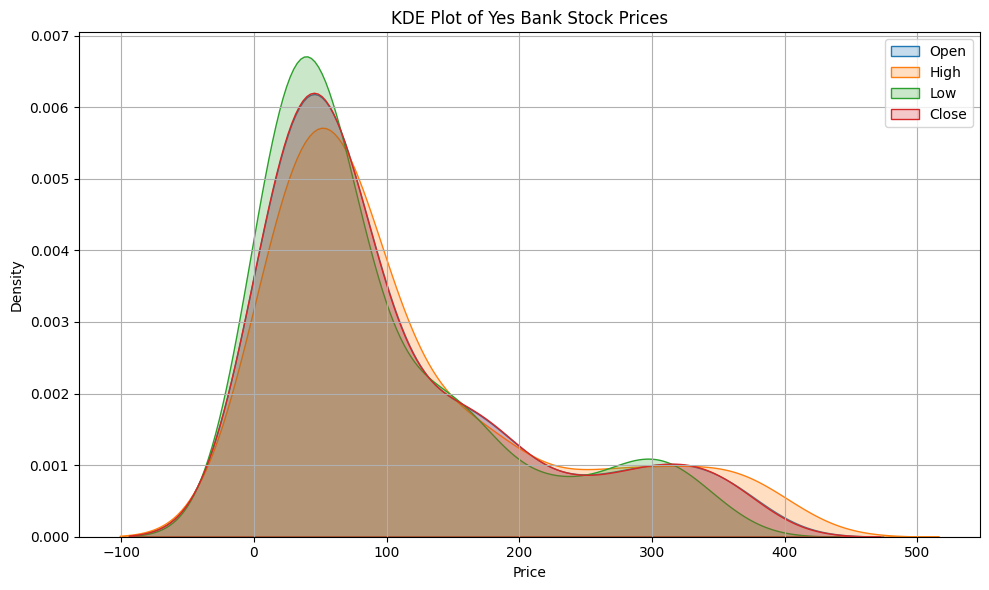

In [ ]:

plt.figure(figsize=(10, 6))

# KDE for each column
sns.kdeplot(df['Open'], label='Open', shade=True)
sns.kdeplot(df['High'], label='High', shade=True)
sns.kdeplot(df['Low'], label='Low', shade=True)
sns.kdeplot(df['Close'], label='Close', shade=True)

plt.title('KDE Plot of Yes Bank Stock Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

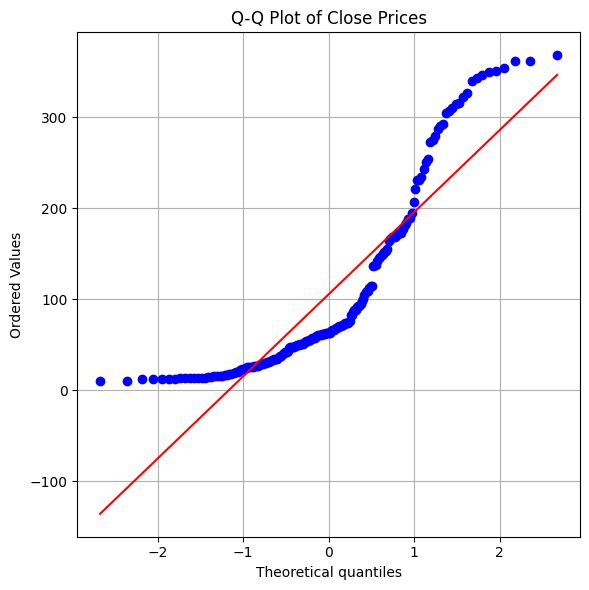

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot for 'Close' prices
plt.figure(figsize=(6, 6))
stats.probplot(df['Close'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Close Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


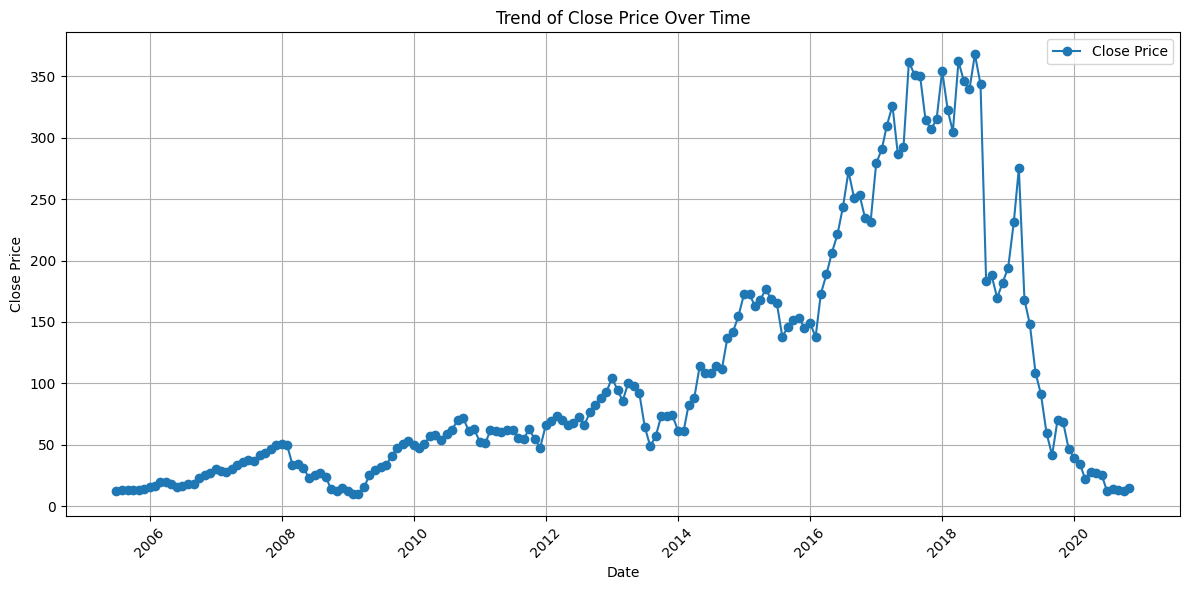

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')  # convert to datetime
df = df.sort_values('Date')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', marker='o')
plt.title('Trend of Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

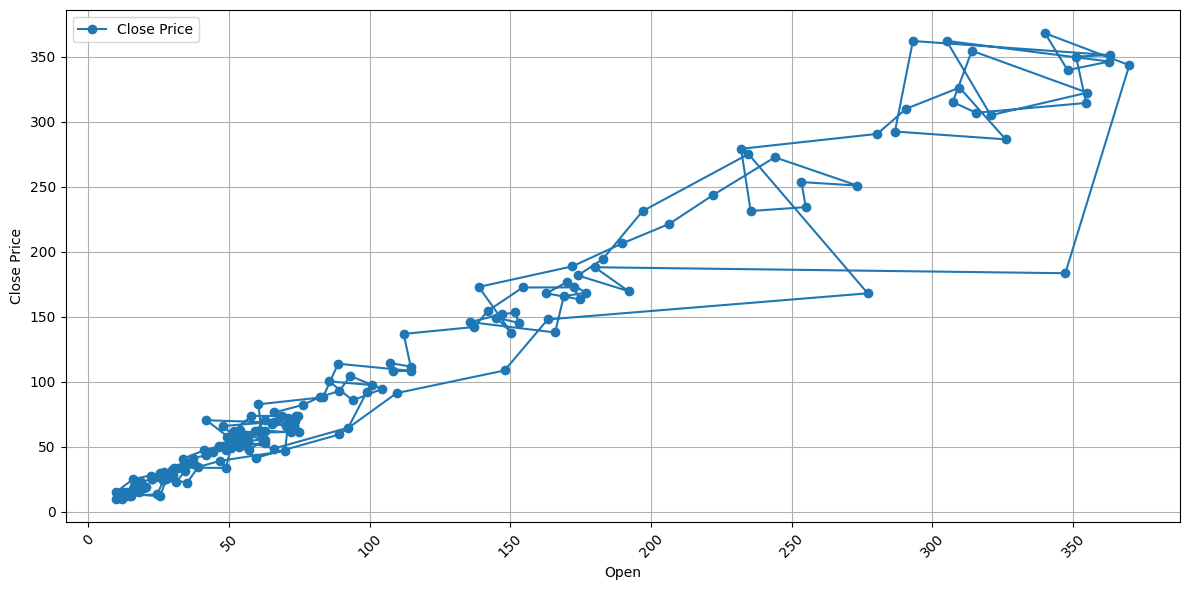

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], df['Close'], label='Close Price', marker='o')
plt.xlabel('Open')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

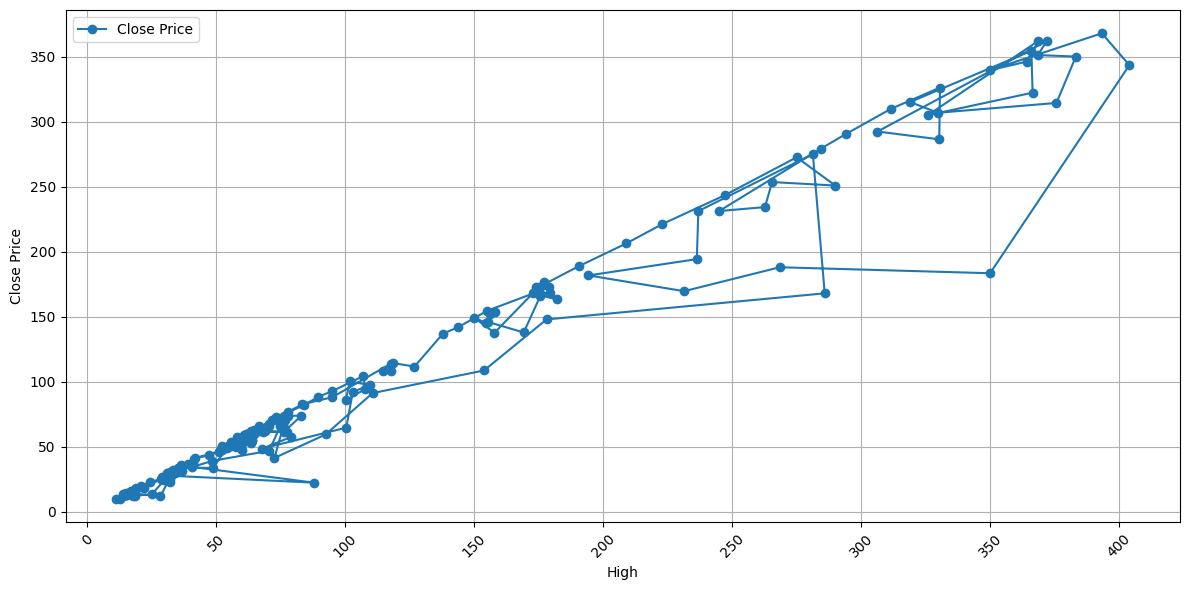

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], df['Close'], label='Close Price', marker='o')
plt.xlabel('High')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

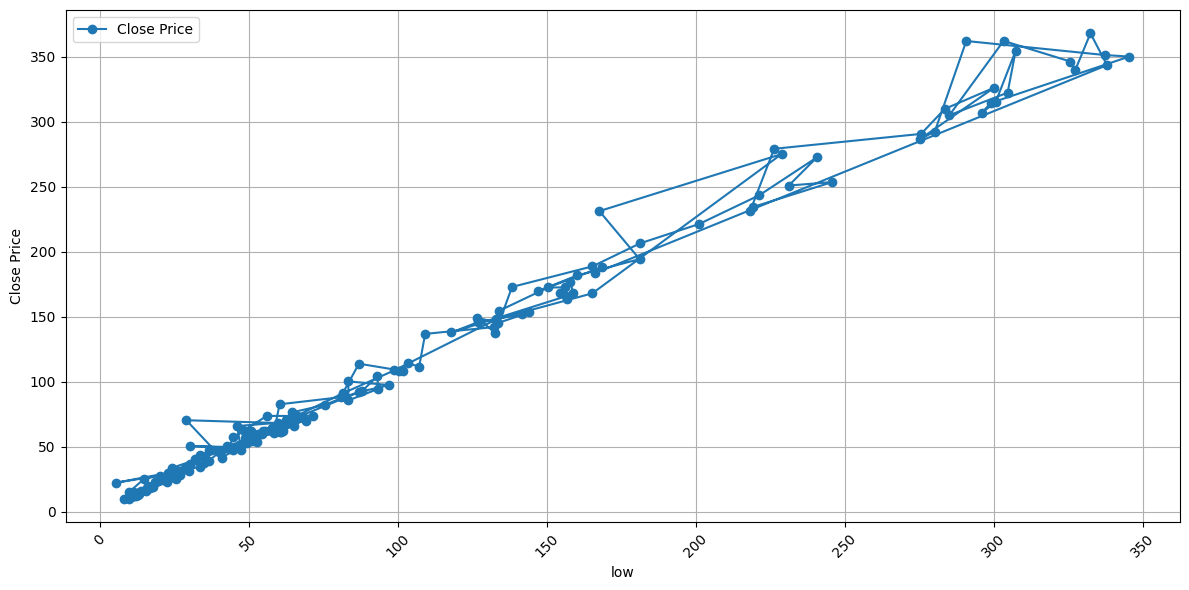

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Low'], df['Close'], label='Close Price', marker='o')
plt.xlabel('low')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1bc3e48a51d537d6325782b333f0e67fa70d38db2775287e84b46c286c212e2d
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

# Load your DataFrame
# df = pd.read_csv('your_file.csv')  # or however you get your DataFrame

# Create a profiling report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# Display within notebook (if using Jupyter/Colab)
profile.to_notebook_iframe()

# OR: Save to HTML
profile.to_file("pandas_profiling_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 126.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Define features and target
features = ['Open', 'High', 'Low']
target = 'Close'

# Prepare data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Store results
results = []

# 1. Linear Regression (no hyperparameters to tune)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
results.append({
    'Model': 'Linear Regression',
    'RMSE': np.sqrt(mean_squared_error(y_test, lr_pred)),
    'R2': r2_score(y_test, lr_pred)
})

# 2. Random Forest Regressor
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, None]
}
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
results.append({
    'Model': f'Random Forest ({rf_grid.best_params_})',
    'RMSE': np.sqrt(mean_squared_error(y_test, rf_pred)),
    'R2': r2_score(y_test, rf_pred)
})

# 3. Gradient Boosting Regressor
gbr_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [2, 3]
}
gbr = GradientBoostingRegressor(random_state=42)
gbr_grid = GridSearchCV(gbr, gbr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gbr_grid.fit(X_train, y_train)
gbr_best = gbr_grid.best_estimator_
gbr_pred = gbr_best.predict(X_test)
results.append({
    'Model': f'Gradient Boosting ({gbr_grid.best_params_})',
    'RMSE': np.sqrt(mean_squared_error(y_test, gbr_pred)),
    'R2': r2_score(y_test, gbr_pred)
})

# Display all results
results_df = pd.DataFrame(results)
print(results_df)


                                               Model       RMSE        R2
0                                  Linear Regression   6.444796  0.968261
1  Random Forest ({'max_depth': None, 'n_estimato...  12.121392  0.887725
2  Gradient Boosting ({'learning_rate': 0.1, 'max...  10.890736  0.909365


In [ ]:
#Hypothesis Tests

1. One-Sample t-test

In [ ]:
from scipy.stats import ttest_1samp

# Test if mean of 'Close' price = 100
t_stat, p_val = ttest_1samp(df['Close'], 100)
print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")


t-statistic: 0.7181, p-value: 0.4736


In [ ]:
1. Two-Sample t-test

In [ ]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(df['Open'], df['Close'])
print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")


t-statistic: 0.0328, p-value: 0.9739
